In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import datetime
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

In [2]:
sns.set()
register_matplotlib_converters()

In [3]:
def lissage(values, coef):
    ny = []
    for i, v in enumerate(values):
        if i>=coef:
            if i<=len(values)-coef:
                ny.append(np.mean(values[i-coef:i+coef]))
            else:
                ny.append(np.mean(values[i-coef:-1]))
        else:
            ny.append(np.mean(values[0:i+coef]))
    return ny

In [4]:
data = pd.read_csv('https://opendata.ecdc.europa.eu/covid19/casedistribution/csv/')
#data = data[data['month'] > 2][data['month'] != 12]
data = data[['dateRep', 'cases', 'deaths', 'countriesAndTerritories', 'popData2018']]

In [5]:
data.head()

,dateRep,cases,deaths,countriesAndTerritories,popData2018
0,30/05/2020,623,11,Afghanistan,37172386.0
1,29/05/2020,580,8,Afghanistan,37172386.0
2,28/05/2020,625,7,Afghanistan,37172386.0
3,27/05/2020,658,1,Afghanistan,37172386.0
4,26/05/2020,591,1,Afghanistan,37172386.0


In [6]:
dates = {}
for i, line in data.iterrows():
    if(line['dateRep'] not in dates.keys()):
        dates[line['dateRep']] = line['cases']
    else:
        dates[line['dateRep']] += line['cases']

In [7]:
data['worldCases'] = [dates[date] for date in data['dateRep']]
data['casesRate'] = data['cases']/data['worldCases']
data['casesProp'] = data['cases']/data['popData2018']*1000000

In [8]:
data = data.fillna(0)

In [9]:
data.head()

,dateRep,cases,deaths,countriesAndTerritories,popData2018,worldCases,casesRate,casesProp
0,30/05/2020,623,11,Afghanistan,37172386.0,122354,0.005092,16.759753
1,29/05/2020,580,8,Afghanistan,37172386.0,119840,0.004840,15.602980
2,28/05/2020,625,7,Afghanistan,37172386.0,101548,0.006155,16.813556
3,27/05/2020,658,1,Afghanistan,37172386.0,95870,0.006863,17.701312
4,26/05/2020,591,1,Afghanistan,37172386.0,89096,0.006633,15.898899


In [10]:
def display(data, column, countries, title, startInMarch=False):
    by_country_data = {}
    for i, line in data.iterrows():
        if not startInMarch or (datetime.datetime.strptime(line['dateRep'],"%d/%m/%Y").date() - datetime.date(2020, 3, 1)).days > 0:
            if(line['countriesAndTerritories'] not in by_country_data.keys()):
                by_country_data[line['countriesAndTerritories']] = {}
            by_country_data[line['countriesAndTerritories']][line['dateRep']] = line[column]
        
    plt.figure(figsize=(10, 10))
    #plt.ylim((0, 0.002))
    for key, values in by_country_data.items():
        if key not in countries:
            continue
        #X = np.array([(datetime.datetime.strptime(d,"%d/%m/%Y").date()  - datetime.date(2020, 1, 1)).days for d in values.keys()])
        X = np.array([datetime.datetime.strptime(d,"%d/%m/%Y").date() for d in values.keys()])
        y = list(values.values())
        ny = lissage(y, 5)
        #plt.plot(X, y, label=key)
        plt.plot(X, ny, label=key)
    plt.xticks(rotation=45)
    plt.legend()
    __ = plt.title(title)

In [11]:
countries = ['Belgium', 'France', 'Italy', 'Spain', 'United_States_of_America', 'China', 'South_Korea', 'Brazil']
headCountries = ['Belgium', 'France']

In [12]:
bestof = lambda key, minPop=1000000: list(data[(data['dateRep'] == '24/05/2020') & (data['popData2018'] > minPop)].sort_values(key, ascending=False).head(5)['countriesAndTerritories'].values)

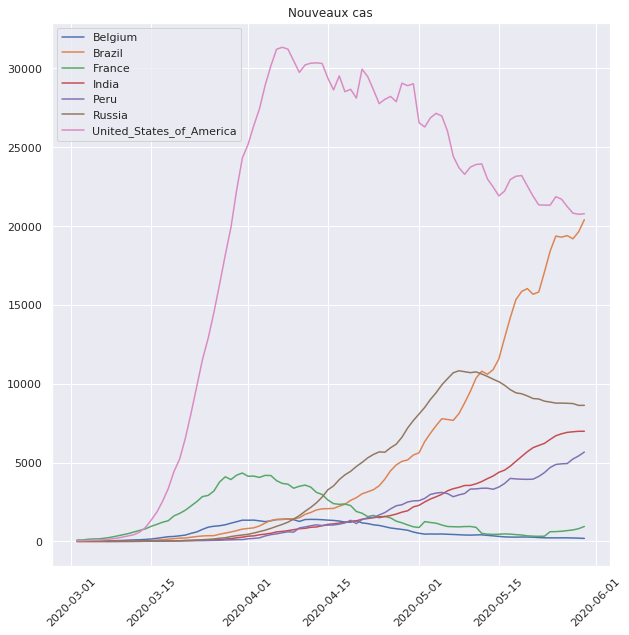

In [13]:
display(
    data,
    'cases',
    bestof('cases') + headCountries,
    'Nouveaux cas',
    True
)

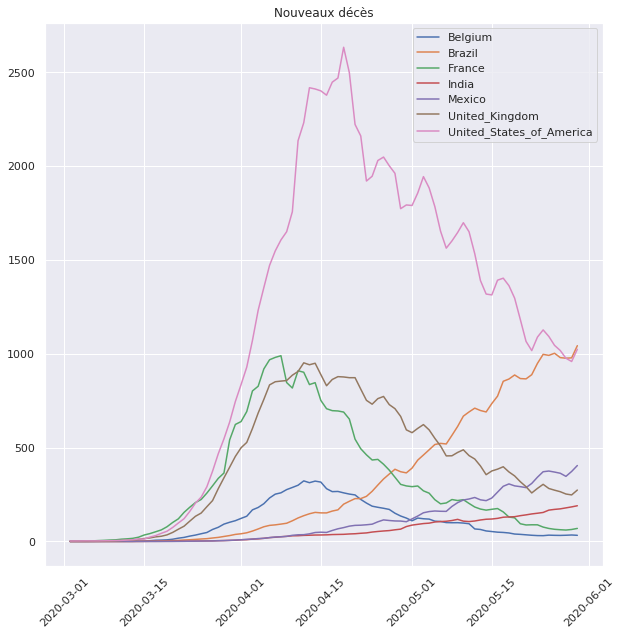

In [14]:
display(
    data,
    'deaths',
    bestof('deaths') + headCountries,
    'Nouveaux décès',
    True
)

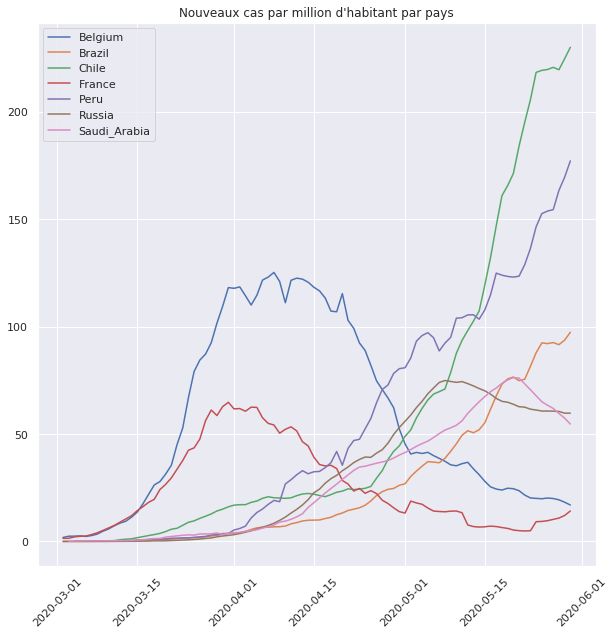

In [15]:
display(
    data,
    'casesProp',
    bestof('casesProp', minPop=10000000) + headCountries,
    'Nouveaux cas par million d\'habitant par pays',
    True
)

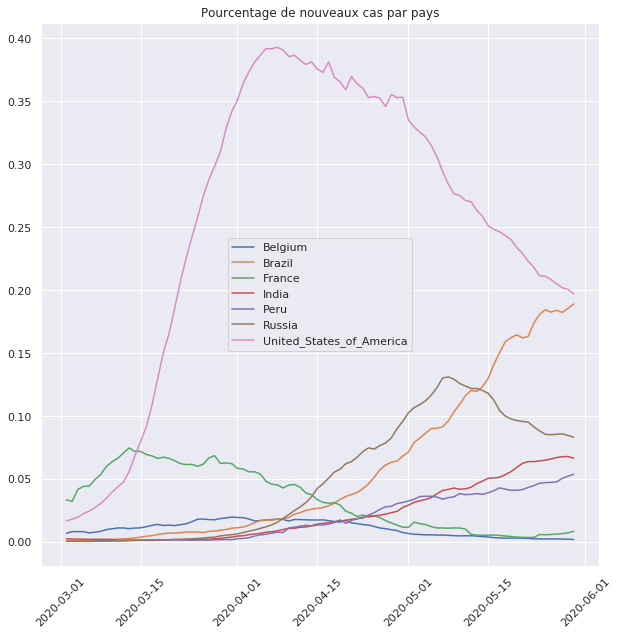

In [16]:
display(
    data,
    'casesRate', 
    bestof('casesRate') + headCountries,
    'Pourcentage de nouveaux cas par pays',
    True
)

In [17]:
cases_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
recovered_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
deaths_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [18]:
cases_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,8145,8676,9216,9998,10582,11173,11831,12456,13036,13659
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,964,969,981,989,998,1004,1029,1050,1076,1099
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,7542,7728,7918,8113,8306,8503,8697,8857,8997,9134
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,762,762,762,762,762,763,763,763,763,764
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,52,58,60,61,69,70,70,71,74,81


In [19]:
recovered_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,930,938,996,1040,1075,1097,1128,1138,1209,1259
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,758,771,777,783,789,795,803,812,823,851
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,3968,4062,4256,4426,4784,4747,4918,5129,5277,5422
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,639,639,652,653,653,663,676,676,681,684
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,17,17,17,18,18,18,18,18,18,18


In [20]:
deaths_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,187,193,205,216,218,219,220,227,235,246
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,31,31,31,31,32,32,33,33,33,33
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,568,575,582,592,600,609,617,623,630,638
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,51
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,3,3,3,4,4,4,4,4,4,4


In [21]:
belgium_cases = cases_data[cases_data['Country/Region'] == 'Belgium'].drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1)
belgium_cases['type'] = 'confirmed'
belgium_cases = belgium_cases.set_index('type')

belgium_recovered = recovered_data[recovered_data['Country/Region'] == 'Belgium'].drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1)
belgium_recovered['type'] = 'recovered'
belgium_recovered = belgium_recovered.set_index('type')

belgium_deaths = deaths_data[deaths_data['Country/Region'] == 'Belgium'].drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1)
belgium_deaths['type'] = 'deaths'
belgium_deaths = belgium_deaths.set_index('type')

In [22]:
belgium_data = pd.concat([belgium_cases, belgium_recovered, belgium_deaths])
belgium_data.loc['current'] = belgium_data.loc['confirmed'] - belgium_data.loc['recovered'] - belgium_data.loc['deaths']

In [23]:
belgium_data

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20
type,,,,,,,,,,,,,,,,,,,,,
confirmed,0,0,0,0,0,0,0,0,0,0,...,55983,56235,56511,56810,57092,57342,57455,57592,57849,58061
recovered,0,0,0,0,0,0,0,0,0,0,...,14847,14988,15123,15155,15272,15297,15320,15465,15572,15682
deaths,0,0,0,0,0,0,0,0,0,0,...,9150,9186,9212,9237,9280,9312,9334,9364,9388,9430
current,0,0,0,0,0,0,0,0,0,0,...,31986,32061,32176,32418,32540,32733,32801,32763,32889,32949


In [24]:
X = np.array([datetime.datetime.strptime(d,"%m/%d/%y").date() for d in belgium_data.columns])

In [25]:
colors = {
    'blue': "#4C72B0",
    'orange': "#DD8452",
    'green': "#55A868",
    'red': "#C44E52", 
    'purple': "#8172B3", 
    'brown': "#937860", 
    'pink': "#DA8BC3", 
    'gray': "#8C8C8C", 
    'yellow': "#CCB974", 
    'lightblue': "#64B5CD",
    'lightgray': "#ACACAC",
}

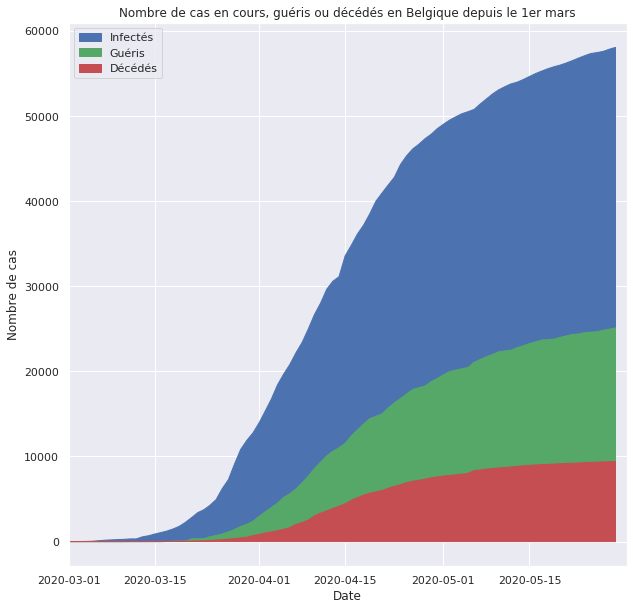

In [26]:
plt.figure(figsize=(10,10))
plt.xlim((datetime.date(2020, 3, 1), datetime.datetime.now()))
plt.ylabel('Nombre de cas')
plt.xlabel('Date')
plt.title('Nombre de cas en cours, guéris ou décédés en Belgique depuis le 1er mars')
plt.fill_between(X, belgium_data.loc['confirmed'], belgium_data.loc['recovered']+belgium_data.loc['deaths'], label='Infectés', color=colors['blue'])
plt.fill_between(X, belgium_data.loc['recovered']+belgium_data.loc['deaths'], belgium_data.loc['deaths'], label='Guéris', color=colors['green'])
plt.fill_between(X, belgium_data.loc['deaths'], 0, label='Décédés', color=colors['red'])
plt.legend(loc='upper left')

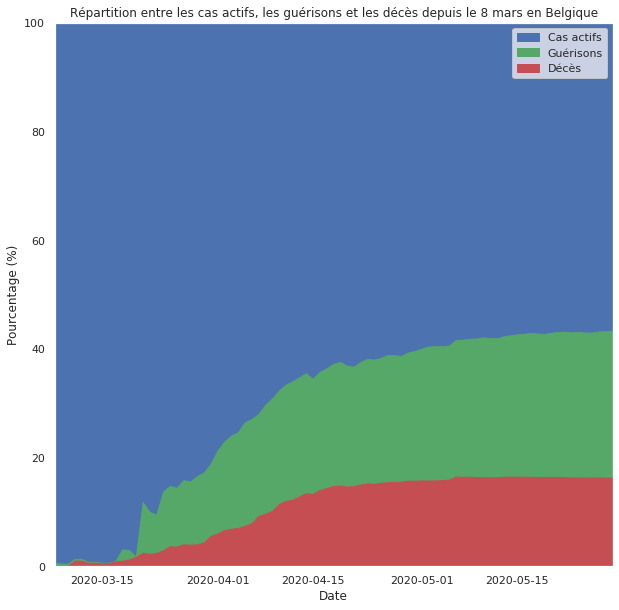

In [27]:
plt.figure(figsize=(10,10))
plt.ylim((0, 100))
plt.xlim((datetime.date(2020, 3, 8), X[-1]))
plt.title('Répartition entre les cas actifs, les guérisons et les décès depuis le 8 mars en Belgique')
plt.ylabel('Pourcentage (%)')
plt.xlabel('Date')
recanddeaths = (belgium_data.loc['recovered']+belgium_data.loc['deaths'])/belgium_data.loc['confirmed']*100
deaths = belgium_data.loc['deaths']/belgium_data.loc['confirmed']*100
plt.fill_between(X, 100, recanddeaths, label='Cas actifs', color=colors['blue'])
plt.fill_between(X, recanddeaths, deaths, label='Guérisons', color=colors['green'])
plt.fill_between(X, deaths, 0, label='Décès', color=colors['red'])
plt.legend()

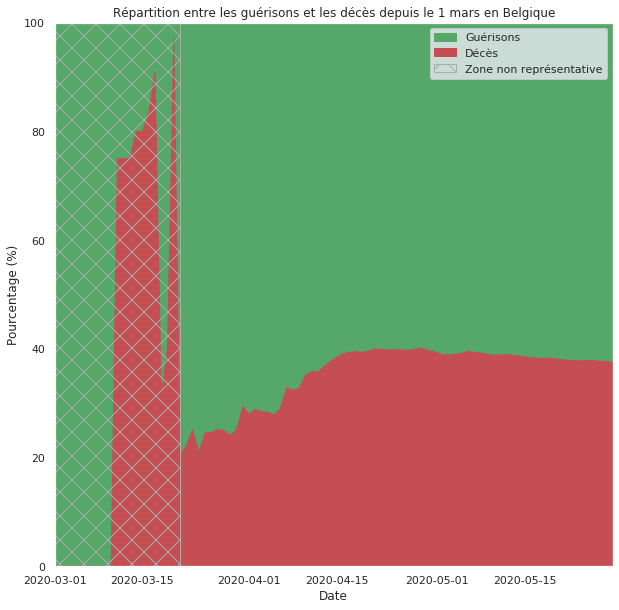

In [28]:
plt.figure(figsize=(10,10))
plt.ylim((0, 100))
plt.xlim((datetime.date(2020, 3, 1), X[-1]))
plt.title('Répartition entre les guérisons et les décès depuis le 1 mars en Belgique')
plt.ylabel('Pourcentage (%)')
plt.xlabel('Date')
deaths = belgium_data.loc['deaths']/(belgium_data.loc['recovered']+belgium_data.loc['deaths'])*100
plt.fill_between(X, 100, deaths, label='Guérisons', color=colors['green'])
plt.fill_between(X, deaths, 0, label='Décès', color=colors['red'])
plt.fill_between((X[0], datetime.date(2020, 3, 21)), (100, 100), facecolor='none', hatch='X', edgecolor=colors['lightgray'], label="Zone non représentative")
plt.legend()

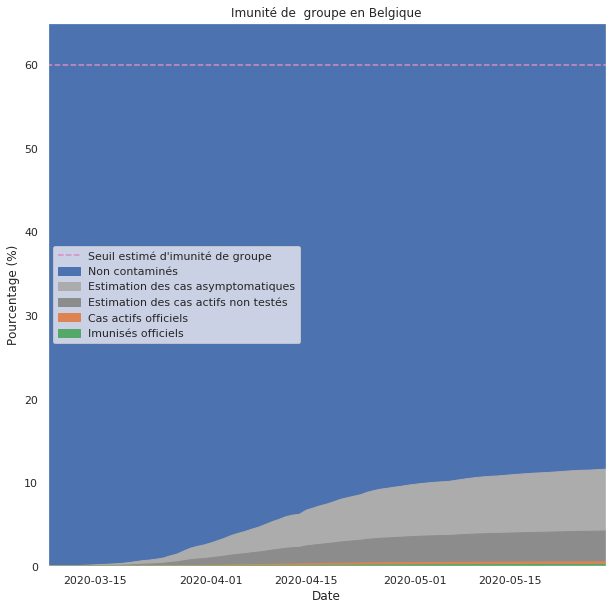

In [29]:
plt.figure(figsize=(10,10))
plt.xlim((datetime.date(2020, 3, 8), X[-1]))
plt.title('Imunité de  groupe en Belgique')
plt.ylabel('Pourcentage (%)')
plt.xlabel('Date')
plt.ylim((0, 65))
tested_actifs = belgium_data.loc['confirmed']/110000
untested_actifs = tested_actifs*7
imun = (belgium_data.loc['recovered']+belgium_data.loc['deaths'])/110000
plt.fill_between(X, 100, tested_actifs+untested_actifs*3, label='Non contaminés', color=colors['blue'])
plt.fill_between(X, tested_actifs+untested_actifs*3, tested_actifs+untested_actifs, label='Estimation des cas asymptomatiques', color=colors['lightgray'])
plt.fill_between(X, untested_actifs+tested_actifs, tested_actifs, label='Estimation des cas actifs non testés', color=colors['gray'])
plt.fill_between(X, tested_actifs, imun, label='Cas actifs officiels', color=colors['orange'])
plt.fill_between(X, imun, 0, label='Imunisés officiels', color=colors['green'])
plt.plot([datetime.date(2020, 1, 1), datetime.datetime.now()], [60, 60], ls='dashed', color=colors['pink'], label='Seuil estimé d\'imunité de groupe')
plt.legend(loc=6)

In [30]:
belgium_data.loc['new_cases'] = [v-belgium_data.loc['confirmed'][i-1] if i>0 else 0 for i, v in enumerate(belgium_data.loc['confirmed'])]

In [31]:
belgium_data.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20
type,,,,,,,,,,,,,,,,,,,,,
confirmed,0,0,0,0,0,0,0,0,0,0,...,55983,56235,56511,56810,57092,57342,57455,57592,57849,58061
recovered,0,0,0,0,0,0,0,0,0,0,...,14847,14988,15123,15155,15272,15297,15320,15465,15572,15682
deaths,0,0,0,0,0,0,0,0,0,0,...,9150,9186,9212,9237,9280,9312,9334,9364,9388,9430
current,0,0,0,0,0,0,0,0,0,0,...,31986,32061,32176,32418,32540,32733,32801,32763,32889,32949
new_cases,0,0,0,0,0,0,0,0,0,0,...,192,252,276,299,282,250,113,137,257,212


In [32]:
tested_data = pd.read_csv('https://epistat.sciensano.be/Data/COVID19BE_tests.csv')
tested_data.drop(tested_data.tail(1).index,inplace=True)

In [33]:
tested_data.head()

,DATE,TESTS
0,2020-03-01,56
1,2020-03-02,269
2,2020-03-03,475
3,2020-03-04,648
4,2020-03-05,704


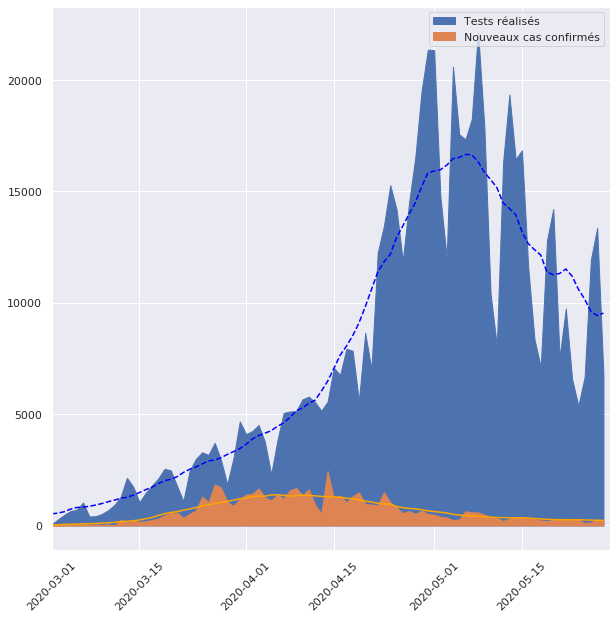

In [34]:
Xt = np.array([datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in tested_data['DATE']])
yt = tested_data['TESTS']
yc = [[
    value 
    for ndate, value 
    in dict(belgium_data.loc['new_cases']).items() 
    if datetime.datetime.strptime(ndate,"%m/%d/%y").date() - date == datetime.timedelta(days=1)][0] for date in Xt]

plt.figure(figsize=(10,10))
plt.xlim((Xt[0], X[-1]))
plt.xticks(rotation=45)
plt.fill_between(Xt, yt, 0, label='Tests réalisés', color=colors['blue'])
plt.plot(Xt, lissage(yt, 10), ls='--', color='blue')
plt.fill_between(Xt, yc, 0, label='Nouveaux cas confirmés', color=colors['orange'])
plt.plot(Xt, lissage(yc, 10), color='orange')
plt.legend()

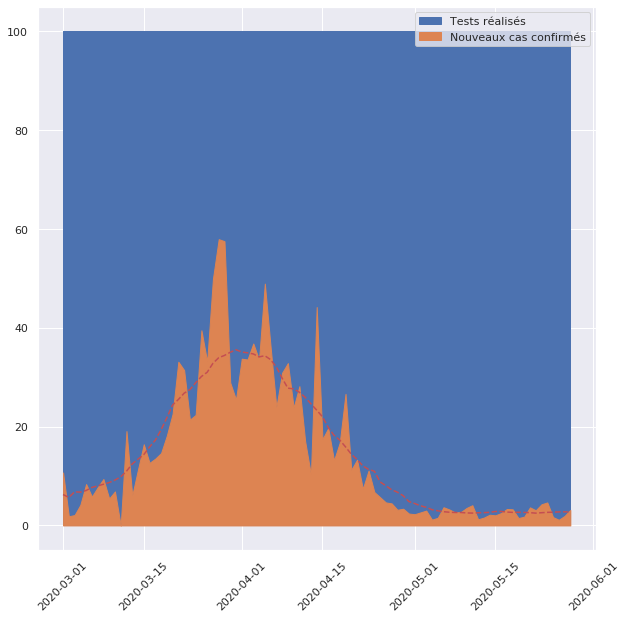

In [35]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=45)
plt.fill_between(Xt, 100, 0, label='Tests réalisés', color=colors['blue'])
plt.fill_between(Xt, yc/yt*100, 0, label='Nouveaux cas confirmés', color=colors['orange'])
plt.plot(Xt, lissage(yc/yt*100, 10), ls='--', color=colors['red'])
plt.legend()